In [204]:
import os
# Set the environment variable before importing any libraries to avoid memory leak
os.environ['OMP_NUM_THREADS'] = '1'

In [205]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScaler
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression

In [263]:
# loading the dataframe
df = pd.read_csv("iris.csv")

In [264]:
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['target'] = iris.target
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [207]:
# viewing the dataset
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [208]:
data.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [209]:
# name of the columns
print('The name of the columns are:', '\n', data.columns)

The name of the columns are: 
 Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')


In [210]:
data.shape

(150, 5)

In [211]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [212]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [213]:
# Check for missing values [skipped imputation i.e.(mode:categorical & mean:numerical) there won't be any]
print("Checking for missing values before handling...")
print(data.isnull().sum())

# Encoding the target variable (only 'target' column needs encoding in the Iris dataset)
print("\nEncoding categorical target variable...")
label_encoder = LabelEncoder()
data['target'] = label_encoder.fit_transform(data['target'])

# Display processed dataset
print("\nProcessed Dataset Information:")
print(data.info())
print("\nFirst Five Rows of Processed Data:")
print(data.head())

Checking for missing values before handling...
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

Encoding categorical target variable...

Processed Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None

First Five Rows of Processed Data:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4      

In [214]:
data.corr(numeric_only=True)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


In [215]:
data['sepal length (cm)'].unique()

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.4, 4.8, 4.3, 5.8, 5.7, 5.2, 5.5,
       4.5, 5.3, 7. , 6.4, 6.9, 6.5, 6.3, 6.6, 5.9, 6. , 6.1, 5.6, 6.7,
       6.2, 6.8, 7.1, 7.6, 7.3, 7.2, 7.7, 7.4, 7.9])

In [216]:
data['sepal length (cm)'].value_counts()

sepal length (cm)
5.0    10
5.1     9
6.3     9
5.7     8
6.7     8
5.8     7
5.5     7
6.4     7
4.9     6
5.4     6
6.1     6
6.0     6
5.6     6
4.8     5
6.5     5
6.2     4
7.7     4
6.9     4
4.6     4
5.2     4
5.9     3
4.4     3
7.2     3
6.8     3
6.6     2
4.7     2
7.6     1
7.4     1
7.3     1
7.0     1
7.1     1
5.3     1
4.3     1
4.5     1
7.9     1
Name: count, dtype: int64

In [217]:
data['target'].unique()

array([0, 1, 2], dtype=int64)

In [218]:
data['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [219]:
# To Calculate mean, median, standard deviation, skewness, and kurtosis for sepal length (cm)
sepal_length_mean = data['sepal length (cm)'].mean()
sepal_length_median = data['sepal length (cm)'].median()
sepal_length_std_dev = data['sepal length (cm)'].std()
sepal_length_std_dev = data['sepal length (cm)'].std()
sepal_length_skewness = data['sepal length (cm)'].skew()
sepal_length_kurtosis = data['sepal length (cm)'].kurt()

# Print resultsmean, median, standard deviation, skewness, and kurtosis for sepal length (cm)
print("Sepal Length (cm) - Mean:", sepal_length_mean)
print("Sepal Length (cm) - Median:", sepal_length_median)
print("Sepal Length (cm) - Standard Deviation:", sepal_length_std_dev)
print("Sepal Length (cm) - Skewness:", sepal_length_skewness)
print("Sepal Length (cm) - Kurtosis:", sepal_length_kurtosis)

Sepal Length (cm) - Mean: 5.843333333333334
Sepal Length (cm) - Median: 5.8
Sepal Length (cm) - Standard Deviation: 0.8280661279778629
Sepal Length (cm) - Skewness: 0.3149109566369728
Sepal Length (cm) - Kurtosis: -0.5520640413156395


In [238]:
#  Preparating Data
# Separating numerical features and the target
# Features
x = data.iloc[:, :-1] 
# Target (variety or class label)
y = data.iloc[:, -1]   

Bar chart saved as bar_chart_class_distribution.png


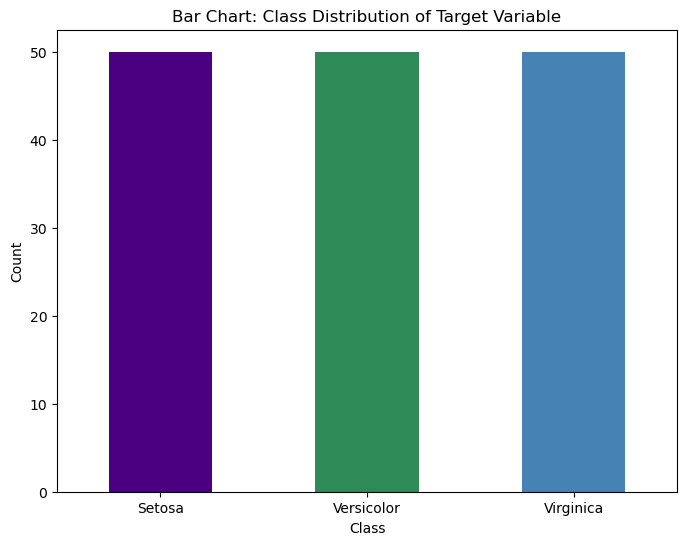

In [239]:
def create_bar_chart(data):
    """
    Create a bar chart to visualize the class distribution of the target variable.

    Parameters:
        data (DataFrame): The dataset to analyze.
    """
    plt.figure(figsize=(8, 6))
    class_counts = data['target'].value_counts()  
    class_counts.plot(kind='bar', color=['indigo', 'seagreen', 'steelblue']) 
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.title('Bar Chart: Class Distribution of Target Variable')
    plt.xticks(ticks=range(len(class_counts)), labels=['Setosa', 'Versicolor', 'Virginica'], rotation=0)  # Map target labels
    plt.savefig('bar_chart_class_distribution.png')  # Save the figure to the specified path as a png file
    print(f"Bar chart saved as {'bar_chart_class_distribution.png'}")
    plt.show()  # Display the plot

# Call the function
create_bar_chart(data)

**Bar Chart**
It helps us visualize the distribution of the target variable (variety) and confirm if the dataset is balanced (important for classification tasks).

Scatter plot saved as scatter_plot_sepal_petal.png


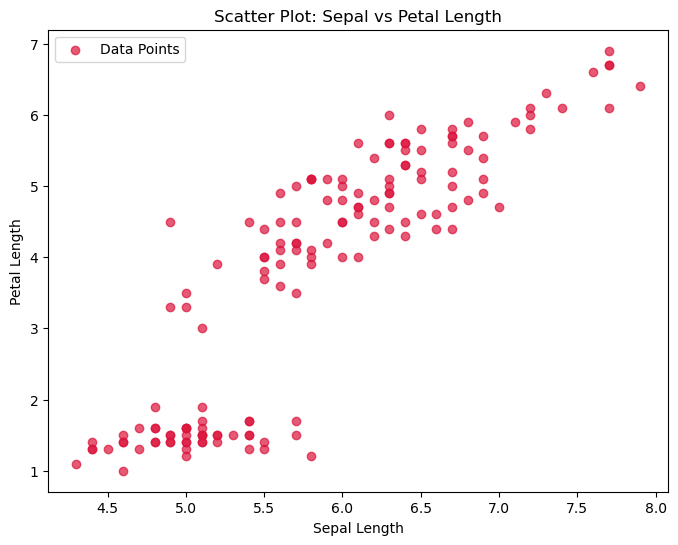

In [265]:
def create_scatter_plot(data, save_path='scatter_plot_sepal_petal.png'):
    """
    Create a scatter plot for two features to visualize their relationship.

    Parameters:
        data (DataFrame): The dataset to analyze.
        save_path (str): The path to save the figure (optional, default is 'scatter_plot_sepal_petal.png').
    """
    # Create the scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(data['sepal length (cm)'], data['petal length (cm)'], c='crimson', alpha=0.7, label='Data Points')

    # Setting labels and title
    plt.xlabel('Sepal Length')
    plt.ylabel('Petal Length')
    plt.title('Scatter Plot: Sepal vs Petal Length')
    plt.legend()
    plt.savefig('scatter_plot_sepal_petal.png')
    print(f"Scatter plot saved as {'scatter_plot_sepal_petal.png'}")
    plt.show()  # Display the plot

# Call the function and save the scatter plot
create_scatter_plot(data)


Visualizing feature distributions


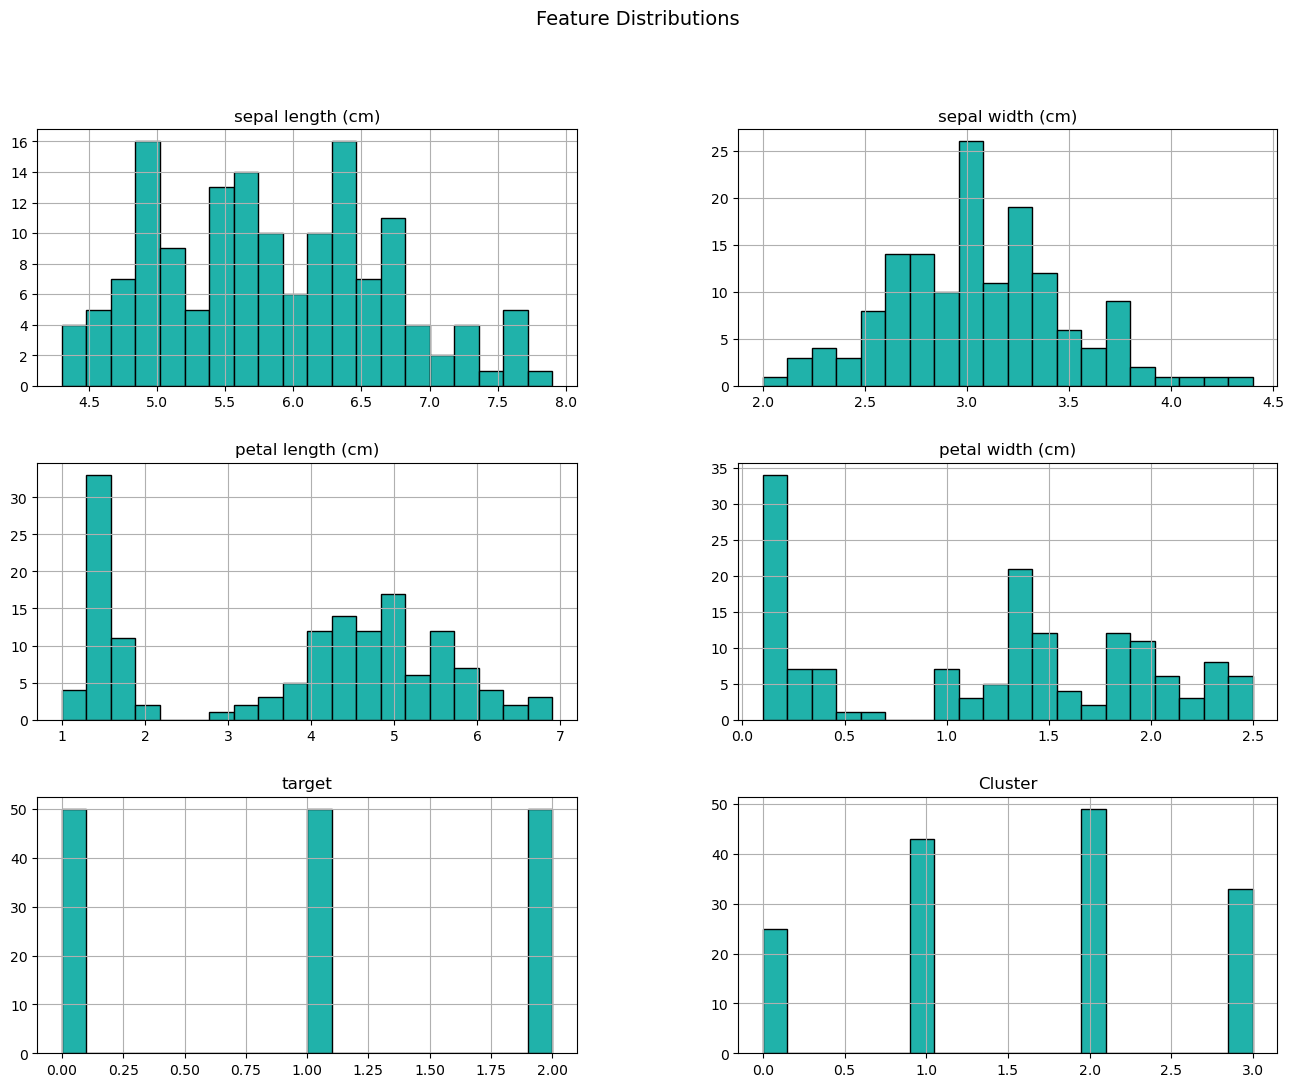


Creating a correlation heatmap


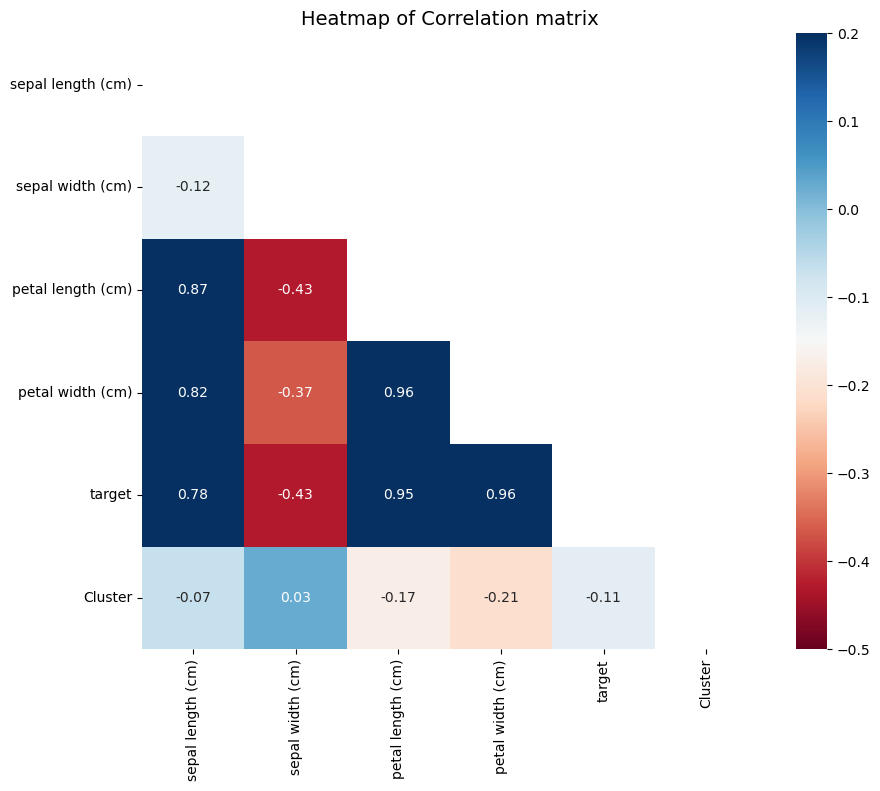

In [262]:
def perform_statistical_analysis(data):
    """
    Perform statistical analysis on the dataset:
    - Visualize distributions of features.
    - Create a correlation heatmap.
    
    Args:
        data (pd.DataFrame): The processed dataset.
    """
    # Visualizing feature distributions
    print("\nVisualizing feature distributions")
    data.hist(figsize=(16, 12), bins=20, color='lightseagreen', edgecolor='black')
    plt.suptitle('Feature Distributions', fontsize=14)
    plt.savefig('Feature_Distributions.png')
    plt.show()

    # plotting the heatmap using seaborn (correlation matrix)
    print("\nCreating a correlation heatmap")
    correlation_matrix = data.corr()
    plt.figure(figsize=(10, 8))
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))# creating mask
    sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', fmt='.2f', square=True, vmin=-0.5, vmax=0.2, mask=mask)
    plt.title('Heatmap of Correlation matrix', fontsize=14)
    plt.savefig('Heatmap_of_Correlation_matrix.png')
    plt.show()

# Performing statistical analysis
perform_statistical_analysis(data)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

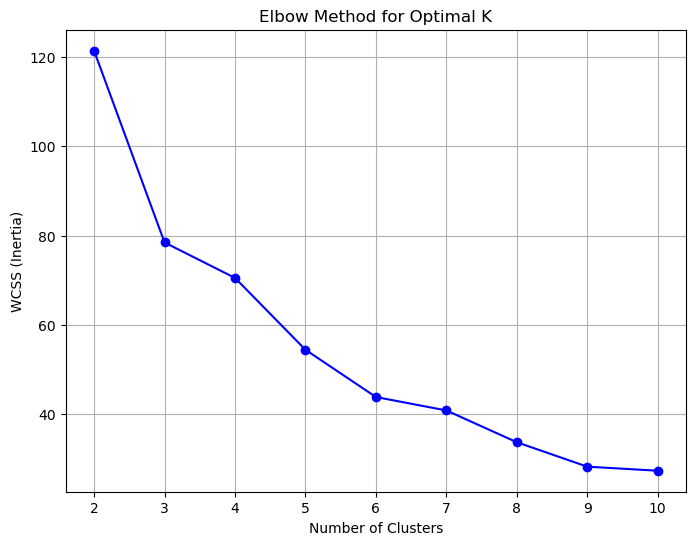

Clustered Data:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  Cluster  
0       0        2  
1       0        2  
2       0        2  
3       0        2  
4       0        2  


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [242]:
# Scale the data (only once)
scaler = RobustScaler()  # Choose either RobustScaler or StandardScaler based on your preference
data_scaled = scaler.fit_transform(data.iloc[:, :-1])  # Scale all features except the target variable

# Elbow Method for Optimal Number of Clusters
def plot_elbow_method(start_k, end_k, wcss):
    plt.figure(figsize=(8, 6))
    plt.plot(range(start_k, end_k + 1), wcss, marker='o', color='blue')
    plt.title('Elbow Method for Optimal K')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS (Inertia)')
    plt.grid(True)
    plt.savefig('Elbow_Method_Optimal_K.png')
    plt.show()

# Calculate WCSS for different numbers of clusters (2 to 10)
wcss = []
for k in range(2, 11):  # We are checking for clusters from 2 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)  # Using scaled data for clustering
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method to find the optimal K
plot_elbow_method(2, 10, wcss)

# Perform clustering after determining the optimal K
def perform_clustering(data, data_scaled, optimal_k=4):
    """
    Perform KMeans clustering and add cluster labels to the original dataframe.

    Parameters:
        data (DataFrame): The original dataset.
        data_scaled (ndarray): The scaled data used for clustering.
        optimal_k (int): The number of clusters.

    Returns:
        DataFrame: The original dataset with an additional 'Cluster' column.
    """
    # Fit KMeans with the optimal clusters
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    data['Cluster'] = kmeans.fit_predict(data_scaled)  # Add cluster labels to the original dataframe (not scaled)

    return data, kmeans

# Call the function to perform clustering
clustered_data, kmeans_model = perform_clustering(data, data_scaled)

# Print the first few rows of the clustered data
print("Clustered Data:")
print(clustered_data.head())

The Elbow Method measures within-cluster sum of squares (WCSS), or inertia, which is the total sum of squared distances between each point in a cluster and the centroid of that cluster.
The idea is to find the point where the inertia starts decreasing at a slower rate (forming an "elbow"). This suggests that adding more clusters beyond this point does not significantly improve the clustering, indicating that the optimal number of clusters is reached.

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


2 clusters: Silhouette Score = 0.54
3 clusters: Silhouette Score = 0.44


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


4 clusters: Silhouette Score = 0.41
5 clusters: Silhouette Score = 0.37


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


6 clusters: Silhouette Score = 0.37
7 clusters: Silhouette Score = 0.36


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


8 clusters: Silhouette Score = 0.38
9 clusters: Silhouette Score = 0.38


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


10 clusters: Silhouette Score = 0.39
Best number of clusters = 2 based on Silhouette Score


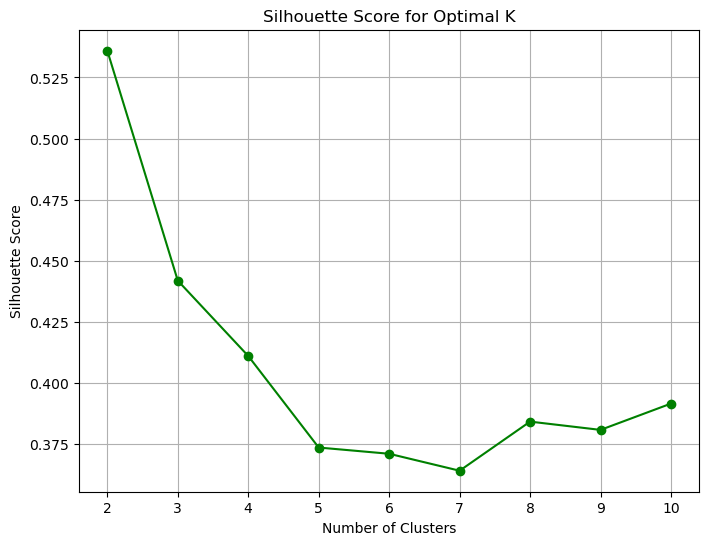

In [245]:
# Silhouette Score Calculation for Optimal Number of Clusters
def one_silhouette_inertia(n, xy):
    """ 
    Calculates the silhouette score and WCSS for n clusters 
    """
    # set up the clusterer with the number of expected clusters
    kmeans = KMeans(n_clusters=n, n_init=20, random_state=42)
    # Fit the data
    kmeans.fit(xy)
    labels = kmeans.labels_
    
    # calculate the silhouette score
    score = silhouette_score(xy, labels)
    inertia = kmeans.inertia_

    return score, inertia

silhouette_scores = []
wcss = []
best_n, best_score = None, -np.inf

# Calculate silhouette scores for different numbers of clusters (2 to 10)
for n in range(2, 11):  
    score, inertia = one_silhouette_inertia(n, data_scaled)  # Using scaled data for silhouette
    silhouette_scores.append(score)
    wcss.append(inertia)
    if score > best_score:
        best_n = n
        best_score = score
    print(f"{n} clusters: Silhouette Score = {score:.2f}")

print(f"Best number of clusters = {best_n} based on Silhouette Score")

# Plot the Silhouette Score for each cluster count
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.savefig('Silhouette_Score_Optimal_K.png')
plt.show()

 The Silhouette Score measures the quality of a clustering by considering both the cohesion (how close the points in a cluster are to each other) and separation (how distinct or far apart the clusters are).
Cohesion: The average distance between each point in the cluster and the centroid of the cluster.
Separation: The average distance between a point and the closest cluster center that is not its own.
How it works:
For each point, it calculates a silhouette value between -1 and 1:
A silhouette score close to +1 means that the point is well-clustered, far from the neighboring clusters.
A score close to 0 means the point is on or near the decision boundary between two clusters.
A score close to -1 indicates that the point is poorly clustered (perhaps assigned to the wrong cluster).
The average silhouette score across all points for a particular number of clusters k is calculated. A higher average silhouette score indicates better clustering (i.e., well-separated and cohesive clusters).

Cluster Characteristics:
         sepal length (cm)  sepal width (cm)  petal length (cm)  \
Cluster                                                           
0                 6.704000          3.276000           5.376000   
1                 5.665116          2.623256           4.186047   
2                 5.016327          3.451020           1.465306   
3                 6.651515          2.872727           5.378788   

         petal width (cm)    target  
Cluster                              
0                2.004000  1.680000  
1                1.318605  1.139535  
2                0.244898  0.000000  
3                1.851515  1.787879  


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


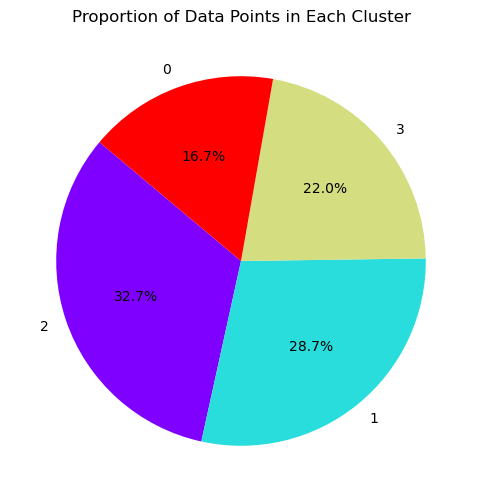

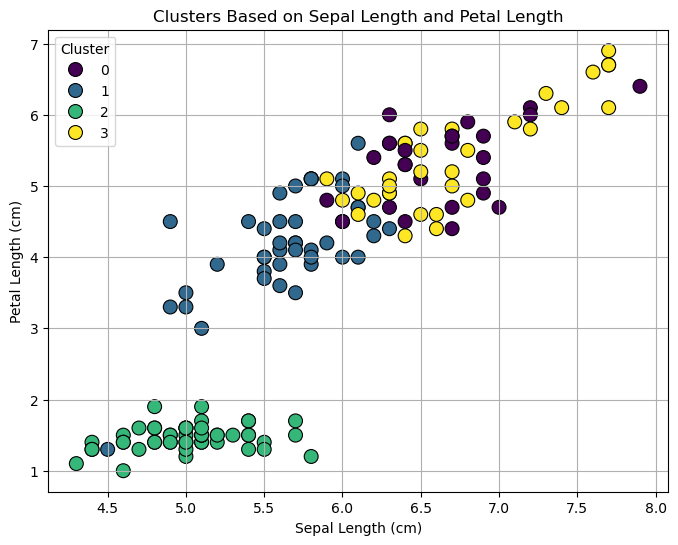

In [248]:
# Step 1: Scale the features (excluding the target column)
scaler = RobustScaler()
data_scaled = scaler.fit_transform(data.iloc[:, :-1])  # Exclude target column for scaling

# Step 2: Perform clustering (for example, with k=4 clusters)
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)  # Add cluster assignments to the original data

# Define the function to analyze the clusters
def analyze_clusters(data):
    """
    Analyze the clusters by calculating feature means and visualizing distributions.

    Args:
        data (pd.DataFrame): Dataset with cluster assignments.

    Returns:
        None
    """
    # Step 1: Calculate Cluster Means
    cluster_means = data.groupby('Cluster').mean()
    print("Cluster Characteristics:")
    print(cluster_means)

    # Step 2: Visualize Cluster Proportions (Pie chart)
    plt.figure(figsize=(6, 6))
    data['Cluster'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='rainbow')
    plt.title("Proportion of Data Points in Each Cluster")
    plt.ylabel("")
    plt.savefig('Proportion_Data Points_Cluster.png')
    plt.show()

    # Step 3: Scatter Plot for Clusters (on original data using sepal length and petal length)
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='sepal length (cm)', y='petal length (cm)', hue='Cluster', data=data, palette='viridis', s=100, edgecolor='k')
    plt.title("Clusters Based on Sepal Length and Petal Length")
    plt.xlabel("Sepal Length (cm)")
    plt.ylabel("Petal Length (cm)")
    plt.legend(title='Cluster')
    plt.grid()
    plt.savefig('Clusters_Based_Sepal_Length.png')
    plt.show()

# After visualizations, perform cluster analysis and print cluster characteristics
analyze_clusters(data)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


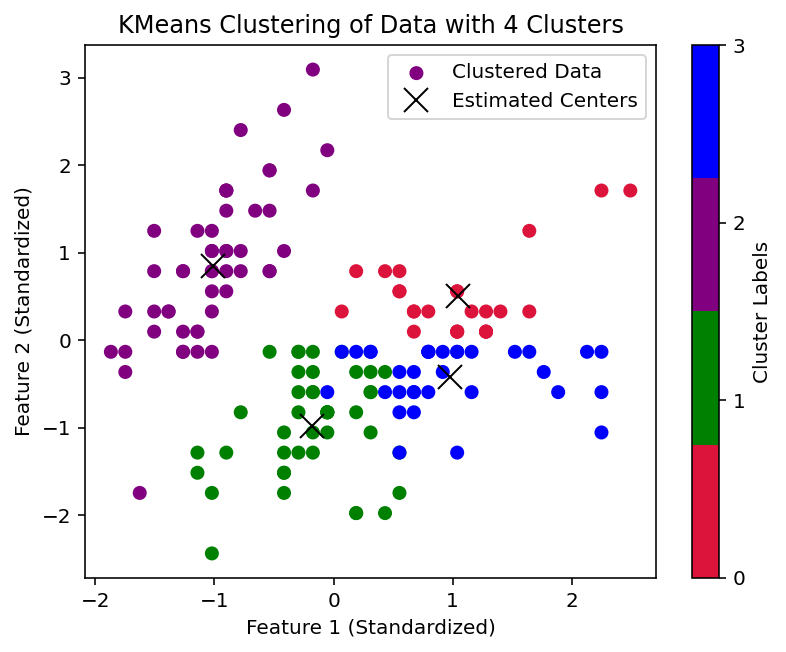

In [249]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Step 2: Perform KMeans clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(data_scaled)
centers = kmeans.cluster_centers_ 

# Extract x and y for plotting 
x = data_scaled[:, 0]
y = data_scaled[:, 1]
xcent = centers[:, 0]
ycent = centers[:, 1]

# Step 3: Plot the clustered data with estimated centers
def plot_fitted_clusters_iris(x, y, labels, xcent, ycent):
    """
    Plots clustered data as a scatter plot with estimated centers for the Iris dataset
    """
    # Custom colors for 4 clusters
    custom_colors = ['crimson', 'green', 'purple', 'blue']  
    cmap = ListedColormap(custom_colors) 
    
    fig, ax = plt.subplots(dpi=144)
    
    # Scatter plot of the data points, colored by cluster labels
    s = ax.scatter(x, y, c=labels, cmap=cmap, marker='o', label='Clustered Data')
    ax.plot(xcent, ycent, 'kx', ms=12, label='Estimated Centers') 
    cbar = fig.colorbar(s, ax=ax)
    cbar.set_ticks(np.unique(labels))
    cbar.set_label('Cluster Labels')
    ax.legend()
    ax.set_xlabel('Feature 1 (Standardized)')
    ax.set_ylabel('Feature 2 (Standardized)')
    ax.set_title('KMeans Clustering of Data with 4 Clusters')
    plt.savefig('KMeans_Clustering.png')
    plt.show()

# Call the function to plot the clusters with estimated centers
plot_fitted_clusters_iris(x, y, labels, xcent, ycent)

In [251]:
from sklearn.decomposition import PCA

In [252]:
# Create a DataFrame from the dataset
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the 'species' column from the target values
df_iris['species'] = iris.target_names[iris.target]

# Check the first few rows of the dataframe
print(df_iris.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


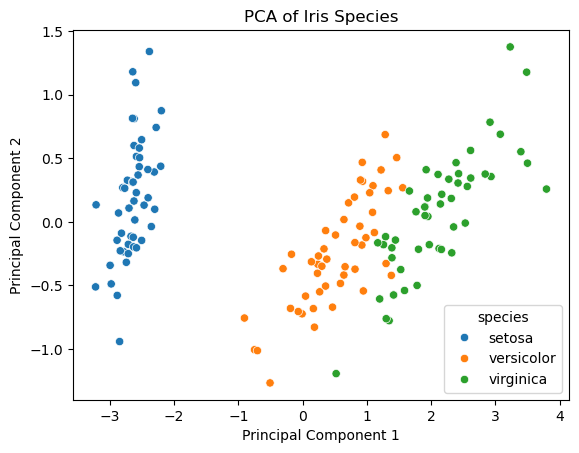

In [254]:
# Perform PCA (reduce to 2 components)
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(df_iris.drop('species', axis=1))  # Drop the 'species' column for PCA

# Create a scatter plot of the PCA components
sns.scatterplot(x=iris_pca[:, 0], y=iris_pca[:, 1], hue=df_iris['species'])
plt.title('PCA of Iris Species')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.savefig('PCA_Iris_Specied.png')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


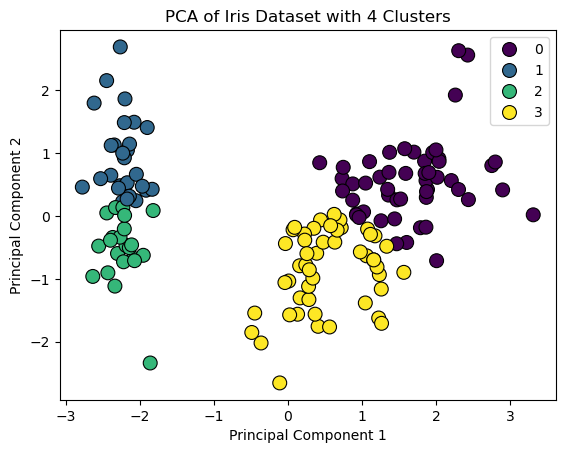

In [255]:
# Create a DataFrame from the dataset
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Step 1: Scale the data for better clustering performance
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_iris)

# Step 2: Perform KMeans clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(df_scaled)

# Step 3: Perform PCA (reduce to 2 components)
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(df_scaled)  # Using scaled data for PCA

# Step 4: Create a scatter plot of the PCA components, color-coded by the cluster labels
sns.scatterplot(x=iris_pca[:, 0], y=iris_pca[:, 1], hue=cluster_labels, palette='viridis', s=100, edgecolor='k')

# Add title and labels
plt.title('PCA of Iris Dataset with 4 Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.savefig('PCA_Iris_Dataset.png')
plt.show()

Visualizing the clusters formed by KMeans instead of the true species labels. Since i am now working with clusters (not species), here is the need to color the points by cluster labels rather than the species.

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


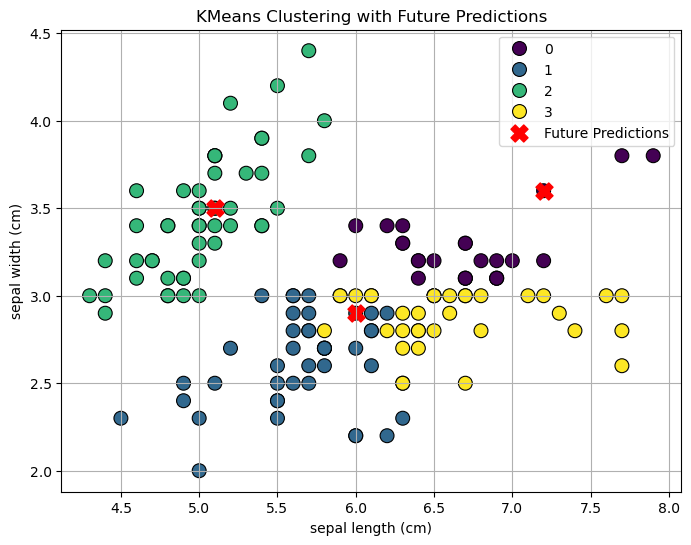

Predicted Cluster for Future Data Point 1: Cluster 1
Predicted Cluster for Future Data Point 2: Cluster 3
Predicted Cluster for Future Data Point 3: Cluster 0


In [257]:
# Define future data points (as an example, we use random data points within the same feature space)
future_data = np.array([[5.1, 3.5, 1.4, 0.2],  # Iris setosa-like data
                        [6.0, 2.9, 4.5, 1.5],  # Iris versicolor-like data
                        [7.2, 3.6, 6.1, 2.5]]) # Iris virginica-like data

# Scale the future data based on the training data scaling
future_data_scaled = scaler.transform(future_data)

# Predict the cluster for future data
future_predictions = kmeans.predict(future_data_scaled)

# Plot the clusters and future predictions
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data.iloc[:, 0], y=data.iloc[:, 1], hue=data['Cluster'], palette='viridis', s=100, edgecolor='k')
plt.scatter(future_data[:, 0], future_data[:, 1], color='red', s=150, marker='X', label='Future Predictions')
plt.title('KMeans Clustering with Future Predictions')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend()
plt.grid(True)
plt.savefig('KMeans Clustering with Future Predictions.png')
plt.show()

# Print future predictions
for i, prediction in enumerate(future_predictions):
    print(f"Predicted Cluster for Future Data Point {i+1}: Cluster {prediction}")

In [145]:
from scipy import stats

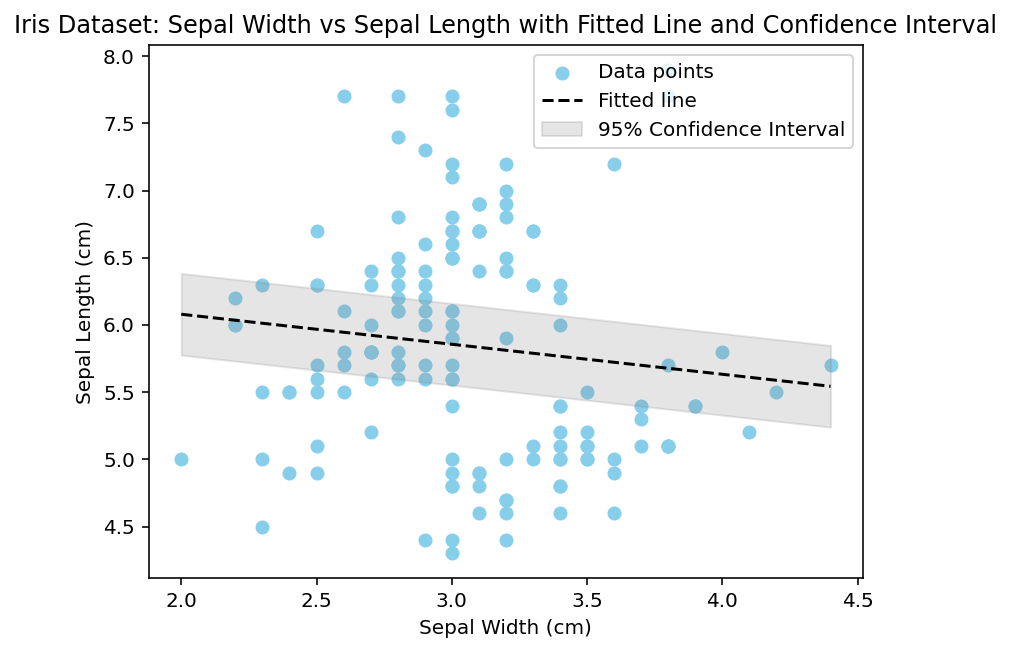

In [258]:
def plot_iris_scatter_with_fitted_line():
    # Load the Iris dataset
    iris = load_iris()
    df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)

    # Prepare the data for regression
    X = df_iris['sepal width (cm)']  # Independent variable (sepal width)
    y = df_iris['sepal length (cm)']  # Dependent variable (sepal length)

    # Fit a linear regression model using scipy's linregress
    slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)

    # Generate points for the fitted line
    xline = np.linspace(np.min(X), np.max(X), 100)
    yline = slope * xline + intercept

    # Create the scatter plot
    plt.figure(dpi=144)
    plt.scatter(X, y, color='skyblue', label="Data points")
    plt.plot(xline, yline, 'k--', label="Fitted line")

    # Calculate the confidence interval for the line
    yfit = slope * xline + intercept
    ci = 1.96 * std_err  # 95% confidence interval (z-score for 95% confidence)

    # Plot the confidence interval (shaded region)
    plt.fill_between(xline, yfit - ci, yfit + ci, color='gray', alpha=0.2, label="95% Confidence Interval")

    # Adding labels and title
    plt.xlabel('Sepal Width (cm)')
    plt.ylabel('Sepal Length (cm)')
    plt.legend()
    plt.title('Iris Dataset: Sepal Width vs Sepal Length with Fitted Line and Confidence Interval')
    plt.savefig('Iris_Fitted_Line_Confidence_Interval.png')
    plt.show()

# Call the function
plot_iris_scatter_with_fitted_line()

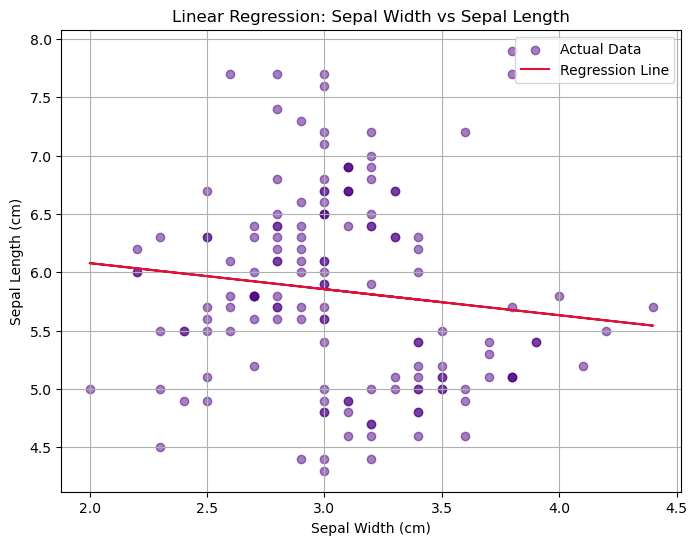

Intercept: 6.526222550894481
Coefficient: -0.22336106112989984


In [260]:
# Load the Iris dataset
iris = load_iris()

# Create a DataFrame for easier manipulation
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)

# Prepare the data for regression
X = df_iris[['sepal width (cm)']]  # Independent variable (sepal width)
y = df_iris['sepal length (cm)']   # Dependent variable (sepal length)

# Create and train the regression model
regressor = LinearRegression()

# Train the model
regressor.fit(X, y)

# Predictions
y_pred = regressor.predict(X)

# Plot actual vs predicted data
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='indigo', alpha=0.5, label='Actual Data')
plt.plot(X, y_pred, color='crimson', label='Regression Line')
plt.title('Linear Regression: Sepal Width vs Sepal Length')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Sepal Length (cm)')
plt.legend()
plt.grid(True)
plt.savefig('Linear_Reg_Sepal_Width_Length.png')
plt.show()

# Print regression coefficients
print(f"Intercept: {regressor.intercept_}")
print(f"Coefficient: {regressor.coef_[0]}")

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


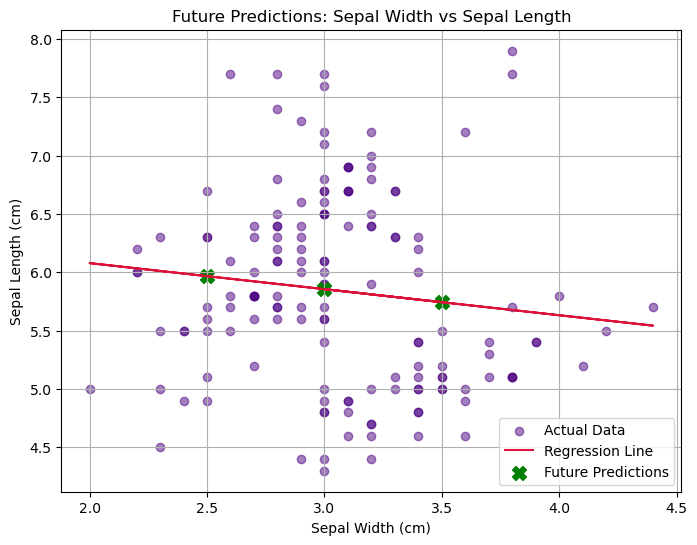

Predicted Sepal Length for Sepal Width 2.5 cm: 5.967819898069731
Predicted Sepal Length for Sepal Width 3.0 cm: 5.856139367504781
Predicted Sepal Length for Sepal Width 3.5 cm: 5.744458836939831


In [261]:
# Prepare the data for regression
X = df_iris[['sepal width (cm)']]  # Independent variable (sepal width)
y = df_iris['sepal length (cm)']   # Dependent variable (sepal length)

# Create and train the regression model
regressor = LinearRegression()

# Train the model
regressor.fit(X, y)

# Predictions
y_pred = regressor.predict(X)

# Define future sepal widths (for example, 2.5, 3.0, 3.5 cm)
future_sepal_widths = np.array([2.5, 3.0, 3.5]).reshape(-1, 1)

# Predict sepal length for future sepal widths
future_predictions = regressor.predict(future_sepal_widths)

# Plot actual vs predicted data
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='indigo', alpha=0.5, label='Actual Data')
plt.plot(X, y_pred, color='crimson', label='Regression Line')
plt.scatter(future_sepal_widths, future_predictions, color='green', s=100, label='Future Predictions', marker='X')
plt.title('Future Predictions: Sepal Width vs Sepal Length')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Sepal Length (cm)')
plt.legend()
plt.grid(True)
plt.savefig('Future_Pred_Sepal_Width_Length.png')
plt.show()

# Print future predictions
for width, prediction in zip(future_sepal_widths.flatten(), future_predictions):
    print(f"Predicted Sepal Length for Sepal Width {width} cm: {prediction}")